In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [3]:
gdp_df = pd.read_csv(r'C:\DA12\Projects\un-python-ryanhartman247\data\gdp_percapita.csv')

In [4]:
type(gdp_df)

pandas.core.frame.DataFrame

In [5]:
gdp_df.head(3)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN


### 5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [7]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


### 6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [9]:
del gdp_df['Value Footnotes']   # this deletes column value footnotes

In [10]:
gdp_df.info()   #to check that column was deleted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB


In [11]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']   #rename columns

In [12]:
gdp_df.info()   #to check that columns were renamed correctly 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7662 non-null   object 
 1   Year            7662 non-null   int64  
 2   GDP_Per_Capita  7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB


### 7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [14]:
missing = gdp_df.isnull().sum()     # I don't think this worked?
print(missing)

Country           0
Year              0
GDP_Per_Capita    0
dtype: int64


In [15]:
gdp_df.columns

Index(['Country', 'Year', 'GDP_Per_Capita'], dtype='object')

In [16]:
gdp_df['Year'].unique()    # counts unique years (I was hoping to find a blank or n/a option but doesn't look like those show)

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2022, 2001,
       2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990],
      dtype=int64)

In [17]:
num_years = gdp_df.Year.nunique()    # counts number of unique years (33) 
print('Total number of years represented:', num_years)

# counts total number of countries represented in df (242) 
count_countries = gdp_df.Country.nunique()
print('Total number of countries represented:', count_countries)

# groups by country and orders by year (sorting by year isn't really necessary..) 
countries_grouped = gdp_df.groupby('Country').nunique().sort_values('Year')
# print(countries_grouped.head(5))   # to preview new df 
# print(len(countries_grouped.index.tolist()))   # checks to make sure I still get 242 countries 

# calculates number of countries with missing year data 
missing_years = countries_grouped[countries_grouped.Year < num_years]
print('Countries with missing year data:', len(missing_years))
#print(missing_years.head())

# calculates number of countries without missing year data
no_missing_years = countries_grouped[countries_grouped.Year == num_years]
print('Countries without missing year data:', len(no_missing_years))

print('\nList of countries w/ missing year data: \n', missing_years.Year)

Total number of years represented: 33
Total number of countries represented: 242
Countries with missing year data: 40
Countries without missing year data: 202

List of countries w/ missing year data: 
 Country
Djibouti                     10
Somalia                      10
Turks and Caicos Islands     12
Sint Maarten (Dutch part)    14
Kosovo                       15
Cayman Islands               16
Nauru                        19
Afghanistan                  20
CuraÃ§ao                     22
Palau                        22
SÃ£o TomÃ© and Principe      22
Qatar                        23
Other small states           23
Timor-Leste                  23
Liberia                      23
Libya                        24
San Marino                   25
Small states                 26
Montenegro                   26
Maldives                     28
Moldova                      28
Israel                       28
Iceland                      28
Estonia                      28
Croatia               

<Axes: xlabel='Year'>

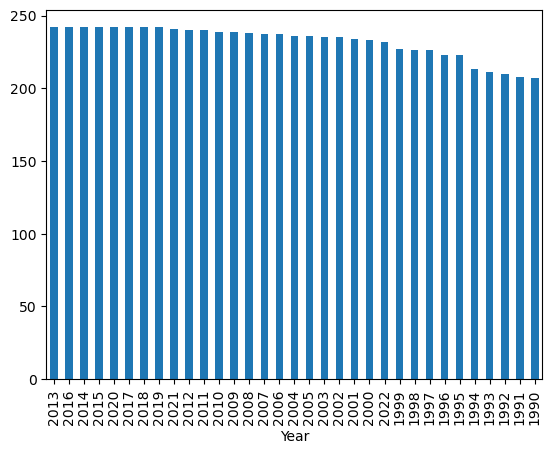

In [18]:
gdp_df['Year'].value_counts().plot(
                 kind = 'bar', 
                 x = 'Year', 
                 y = 'number')

In [19]:
gdp_df.loc[600:605]    # returns a slice

,Country,Year,GDP_Per_Capita
600,Belgium,2002,43890.598110
601,Belgium,2001,43347.889210
602,Belgium,2000,43024.139910
603,Belgium,1999,41583.097392
604,Belgium,1998,40252.468906
605,Belgium,1997,39562.372980


In [20]:
gdp_df.loc[gdp_df['Year']==2019]     # returns data where year equals certain value 

,Country,Year,GDP_Per_Capita
2,Afghanistan,2019,2079.921861
23,Africa Eastern and Southern,2019,3648.220302
56,Africa Western and Central,2019,4093.442853
89,Albania,2019,13653.182207
122,Algeria,2019,11627.279918
...,...,...,...
7504,Viet Nam,2019,10252.004622
7537,West Bank and Gaza,2019,6245.448697
7566,World,2019,16864.894576
7599,Zambia,2019,3372.358980


In [21]:
gdp_df.loc[gdp_df.Year.isin([2019, 2020])]   # different syntax to return same as above, but with multiple options

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
22,Africa Eastern and Southern,2020,3455.023119
23,Africa Eastern and Southern,2019,3648.220302
55,Africa Western and Central,2020,3957.933804
...,...,...,...
7566,World,2019,16864.894576
7598,Zambia,2020,3183.650773
7599,Zambia,2019,3372.358980
7631,Zimbabwe,2020,1990.319419


In [22]:
gdp_df.loc[gdp_df.Year.isna()]    # I thought this was supposed to return the location where year equals n/a ? 

,Country,Year,GDP_Per_Capita


In [23]:
gdp_df.isna().sum    # it doesn't look like any columns have n/a? 
# gdp_df.Year.isna().sum

<bound method DataFrame.sum of       Country   Year  GDP_Per_Capita
0       False  False           False
1       False  False           False
2       False  False           False
3       False  False           False
4       False  False           False
...       ...    ...             ...
7657    False  False           False
7658    False  False           False
7659    False  False           False
7660    False  False           False
7661    False  False           False

[7662 rows x 3 columns]>

In [24]:
gdp_df.GDP_Per_Capita.describe()

count      7662.000000
mean      17206.979219
std       19363.258695
min         436.376416
25%        3655.268993
50%       10132.449293
75%       24119.515045
max      157602.482546
Name: GDP_Per_Capita, dtype: float64

<Axes: >

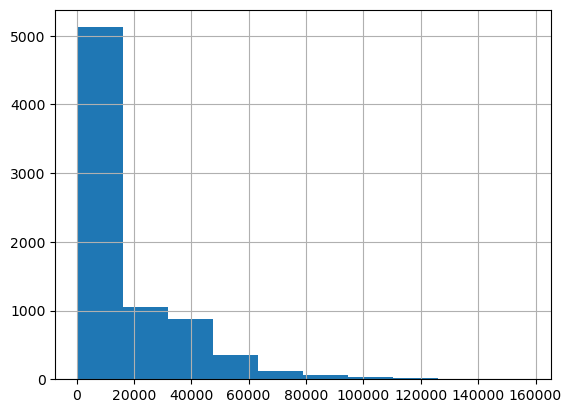

In [25]:
gdp_df.GDP_Per_Capita.hist()

In [26]:
gdp_df.isnull()

,Country,Year,GDP_Per_Capita
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
7657,False,False,False
7658,False,False,False
7659,False,False,False
7660,False,False,False


### 8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
gdp_df_2020 = gdp_df[gdp_df.Year==2020]
print(gdp_df_2020.sort_values('GDP_Per_Capita'))  # prints sample of what will be graphed 

                       Country  Year  GDP_Per_Capita
973                    Burundi  2020      711.355263
1217  Central African Republic  2020      847.765012
1630           Dem. Rep. Congo  2020     1044.071214
6273                   Somalia  2020     1127.418534
5074                     Niger  2020     1214.546556
...                        ...   ...             ...
681                    Bermuda  2020    76117.804744
5746                     Qatar  2020    89019.069857
3279                   Ireland  2020    91356.855054
6108                 Singapore  2020    94910.101431
4148                Luxembourg  2020   111751.314751

[242 rows x 3 columns]


#### Histogram

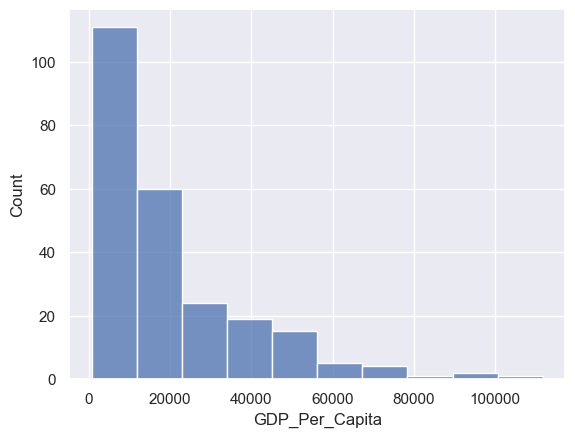

In [123]:
sns.histplot(data=gdp_df_2020, x='GDP_Per_Capita', bins=10)
#plt.xticks(rotation=90, )
plt.show()

#### Density Plot

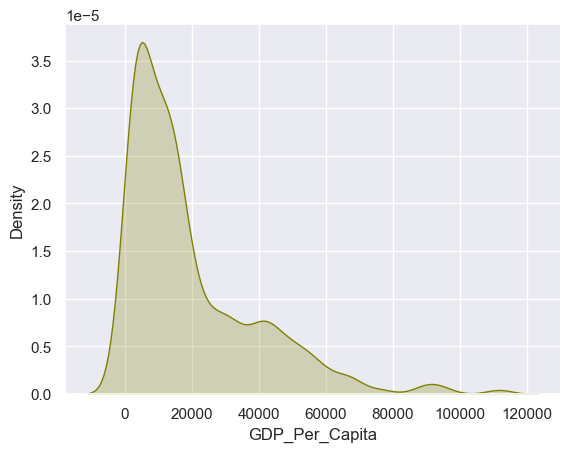

In [91]:
sns.set_theme(style="darkgrid")
sns.kdeplot(gdp_df_2020.GDP_Per_Capita, fill=True, color='olive', bw_method=.2)
plt.show()

#### Boxplot

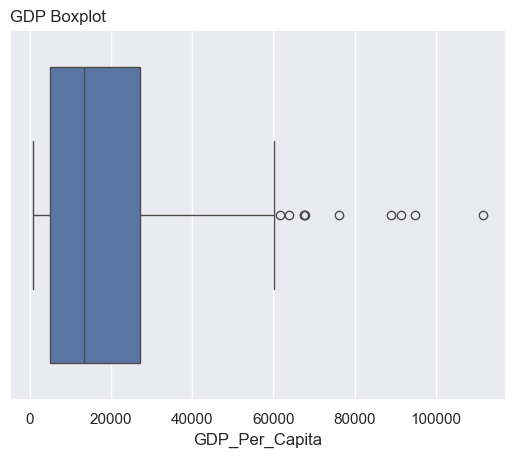

In [83]:
sns.boxplot(x=gdp_df_2020.GDP_Per_Capita)
# plt.xlabel('GDP Per Capita')   why doesn't this work?? 
plt.title('GDP Boxplot', loc='left')
plt.show()

### 9. What was the median GDP per capita value in 2020?

In [110]:
median_gdp_2020 = gdp_df_2020.GDP_Per_Capita.median()
print('Median GDP per capita in 2020: ', round(median_gdp_2020))

Median GDP per capita in 2020:  13358


### 10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  

In [119]:
gdp_df_2020.index

Index([   1,   22,   55,   88,  121,  154,  187,  220,  253,  286,
       ...
       7338, 7371, 7404, 7437, 7470, 7503, 7536, 7565, 7598, 7631],
      dtype='int64', length=242)